In [2]:
from google.colab import drive
drive.mount('/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
import json
with open("/drive/My Drive/data/kaggle.json", "r") as f:
  data = json.loads(f.read())

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = data['username'] # username from the json file
os.environ['KAGGLE_KEY'] = data['key'] # key from the json file
!kaggle competitions download -c Kannada-MNIST # api copied from kaggle

  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 10.6MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 54.1MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 127MB/s]
 93% 9.00M/9.71M [00:00<00:00, 37.0MB/s]
100% 9.71M/9.71M [00:00<00:00, 32.3MB/s]


In [5]:
!unzip Dig-MNIST.csv.zip
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  Dig-MNIST.csv.zip
  inflating: Dig-MNIST.csv           
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv("Dig-MNIST.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [360]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [361]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [362]:
train.groupby("label").size()


label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

# Our classes are balanced

Text(0, 0.5, 'Classes')

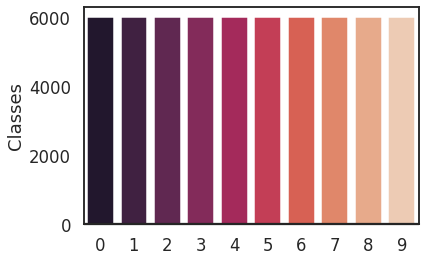

In [363]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

sns.barplot(x=train["label"].unique().tolist(), y=train.groupby("label").size().tolist(), palette="rocket")
plt.axhline(0, color="k", clip_on=False)
plt.ylabel("Classes")

In [364]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### The size of the picture will be 28*28



In [365]:
import math 
math.sqrt(784)

28.0

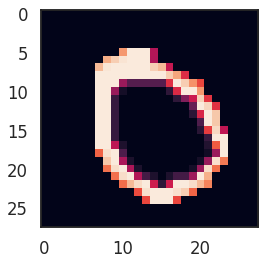

In [366]:
first_row = data.loc[0, data.columns != 'label']
img = first_row.to_numpy()
plt.imshow(img.reshape(28,28))

In [446]:
import torch
import torch.nn as nn
import torch.nn.functional as F


batch_size=120
INPUT_SIZE=28
hidden_size = 28
nb_class = len(list(train.groupby("label").size()))

AttributeError: ignored

In [447]:
y_true = train["label"]
y_true.shape


TypeError: ignored

In [448]:
X_train = train.drop(columns="label")
X_train.shape


AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split
#@markdown  ###Use cross validation to validate our model

In [0]:
X_train_, X_val,  y_train_, y_val = train_test_split(X_train, y_true, test_size=0.30, random_state = 42)

In [451]:
X_val.shape

(18000, 784)

In [452]:
 
X_val_res = torch.Tensor(X_val[0:batch_size].values.reshape(batch_size,28,28))

print(X_val_res.shape)


torch.Size([120, 28, 28])


In [0]:
class RNN(nn.Module):

  def __init__(self, batch_size, INPUT_SIZE, hidden_size, nb_class):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    self.rnn = nn.LSTM(batch_size,         
            INPUT_SIZE,
            hidden_size ,
            batch_first=True
            )
    
  def forward(self, x):
    h_0 = torch.randn(batch_size,INPUT_SIZE, hidden_size)
    c_0 = torch.randn(batch_size,INPUT_SIZE, hidden_size)
    print(x.shape, h_0.shape)    
    output, hidden = self.rnn(x,(h_0,c_0)) # we must add a tuple in the second args, represented as the initial statement
    output = F.log_softmax(output, dim=1)
    output =  output[ :, -1, : ]
    return output, hidden

    
    

In [0]:
rnn = RNN(batch_size, INPUT_SIZE, hidden_size, nb_class)

In [478]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
print(batch_size)

120


In [480]:
def train( X, y_train, epochs, batch_size):
  
  for epoch in range(epochs):
    cache = 0

    for batch in range(batch_size,len(X), batch_size) :

      X_cache = X
      optimizer.zero_grad()

      X_reshape = torch.Tensor(X_cache[cache:batch].values.reshape(batch_size,INPUT_SIZE,INPUT_SIZE))
      cache = batch
      
      output_val, hidden = rnn(X_reshape)

      label = list(y_train[cache:(cache+batch)])
      label = [int(i) for i in label] 
      loss = criterion(output_val.squeeze(), torch.LongTensor(label))
      loss.backward()
      optimizer.step()

      if batch %100 == 0:
        pred_y = rnn(X_reshape)
        
        print('Epoch {}, loss {}'.format(epoch, loss.item()))
        #print('Epoch {}, accuracy {}'.format(epoch, accuracy.item()))
 
train(X_train_, y_train_, epochs=1000, batch_size=120)

torch.Size([120, 28, 28]) torch.Size([28, 120, 28])


RuntimeError: ignored

In [471]:
!git add test.csv train.csv Dig-MNIST.csv

fatal: not a git repository (or any of the parent directories): .git


In [284]:
!git add "./drive/My Drive/MNIST_kaggle.ipynb"

fatal: not a git repository (or any of the parent directories): .git


In [0]:
!git commit -m "add RNN class and first reshape"

In [0]:
!git config --global user.email “”
!git config --global user.name ""

In [0]:
!git push origin master

In [0]:
!ls git

In [0]:
!ls -la ./MNIST_pytorch

In [0]:
!cp -r ./MNIST_pytorch/.git ./